In [2]:
import pandas as pd
df = pd.read_csv("credit_scoring_eng.csv")

In [6]:
print(df.head())

   children  days_employed  dob_years            education  education_id  \
0         1   -8437.673028         42       masters degree             0   
1         1   -4024.803754         36  secondary education             1   
2         0   -5623.422610         33  Secondary Education             1   
3         3   -4124.747207         32  secondary education             1   
4         0  340266.072047         53  secondary education             1   

       family_status  family_status_id gender income_type  debt  \
0            married                 0      F    employee     0   
1            married                 0      F    employee     0   
2            married                 0      M    employee     0   
3            married                 0      M    employee     0   
4  civil partnership                 1      F     retiree     0   

    total_income                  purpose  
0  253875.639453    purchase of the house  
1  112080.014102             car purchase  
2  14588

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB
None


In [10]:
print(df.describe())

           children  days_employed     dob_years  education_id  \
count  21525.000000   19351.000000  21525.000000  21525.000000   
mean       0.538908   63046.497661     43.293380      0.817236   
std        1.381587  140827.311974     12.574584      0.548138   
min       -1.000000  -18388.949901      0.000000      0.000000   
25%        0.000000   -2747.423625     33.000000      1.000000   
50%        0.000000   -1203.369529     42.000000      1.000000   
75%        1.000000    -291.095954     53.000000      1.000000   
max       20.000000  401755.400475     75.000000      4.000000   

       family_status_id          debt  total_income  
count      21525.000000  21525.000000  1.935100e+04  
mean           0.972544      0.080883  1.674223e+05  
std            1.420324      0.272661  1.029716e+05  
min            0.000000      0.000000  2.066726e+04  
25%            0.000000      0.000000  1.030532e+05  
50%            0.000000      0.000000  1.450179e+05  
75%            1.000000    

In [20]:
df.columns


Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [28]:
grouped = df.groupby('debt')[['total_income', 'days_employed']].mean().sort_values(by='total_income', ascending=False)
print(grouped)

       total_income  days_employed
debt                              
0     167804.131651   65018.527718
1     163100.897062   40727.787029


In [30]:
ct = pd.crosstab(df['income_type'], df['debt'])
print(ct)

debt                             0     1
income_type                             
civil servant                 1373    86
employee                     10058  1061
entrepreneur                     2     0
partner                       4709   376
paternity / maternity leave      0     1
retiree                       3640   216
student                          1     0
unempoyed                        1     1


In [32]:
print(df.loc[df['debt'] == 1].iloc[:5])

    children  days_employed  dob_years            education  education_id  \
14         0   -1844.956182         56       masters degree             0   
32         0   -4649.910832         34  SECONDARY EDUCATION             1   
38         0    -597.881827         25       masters degree             0   
55         0            NaN         54  secondary education             1   
75         1   -2953.151948         38  secondary education             1   

        family_status  family_status_id gender income_type  debt  \
14  civil partnership                 1      F     partner     1   
32  civil partnership                 1      F    employee     1   
38          unmarried                 4      M    employee     1   
55  civil partnership                 1      F     retiree     1   
75            married                 0      M    employee     1   

     total_income                      purpose  
14  165127.911772  buy residential real estate  
32  139057.464207             

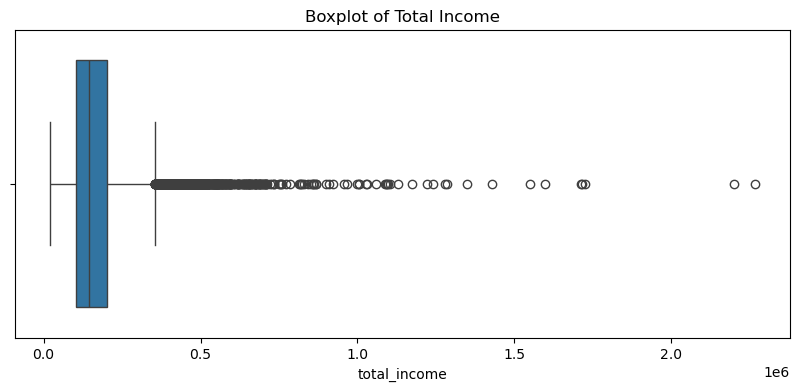

In [34]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['total_income'])
plt.title('Boxplot of Total Income')
plt.show()


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

z_scores = np.abs(stats.zscore(df[['total_income', 'days_employed']]))
outliers_z = df[(z_scores > 3).any(axis=1)]
print("Count:", outliers_z.shape[0])


Count: 0


In [46]:
def detect_iqr_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

outliers_income = detect_iqr_outliers('total_income')
outliers_employment = detect_iqr_outliers('days_employed')
print({outliers_income.shape[0]})
print({outliers_employment.shape[0]})


{818}
{4467}


In [54]:
df_capped = df.copy()

def cap_column(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper, upper,
                          np.where(df[column] < lower, lower, df[column]))
    
cap_column(df_capped, 'total_income')
cap_column(df_capped, 'days_employed')
print(df_capped[['total_income', 'days_employed']].head())

    total_income  days_employed
0  253875.639453   -6431.915133
1  112080.014102   -4024.803754
2  145885.952297   -5623.422610
3  267628.550329   -4124.747207
4  158616.077870    3393.395554


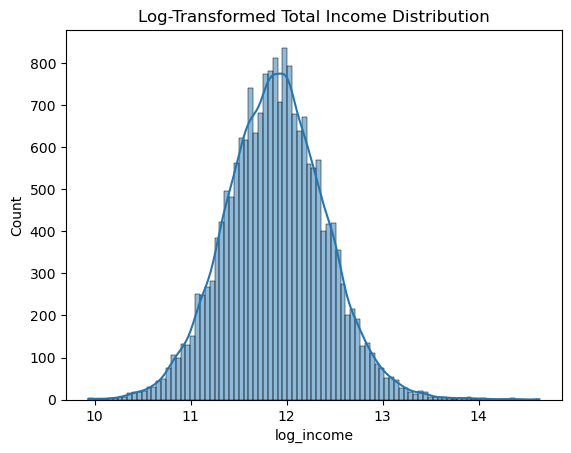

In [50]:
df_log = df.copy()
df_log['log_income'] = np.log(df_log['total_income'] + 1)
sns.histplot(df_log['log_income'], kde=True)
plt.title("Log-Transformed Total Income Distribution")
plt.show()


In [56]:
print(df.iloc[:2, :3])

   children  days_employed  dob_years
0         1   -8437.673028         42
1         1   -4024.803754         36


In [60]:
print("People with debt-1:")
print(df.loc[df['debt'] == 1, ['total_income']].head())

People with debt-1:
     total_income
14  165127.911772
32  139057.464207
38  192247.298639
55            NaN
75   81935.381500


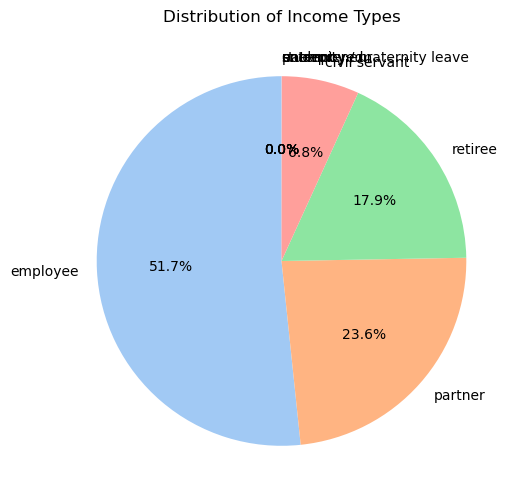

In [62]:
import matplotlib.pyplot as plt
income_counts = df['income_type'].value_counts()
plt.figure(figsize=(6, 6))

income_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Income Types')
plt.ylabel('')
plt.show()

/var/folders/ps/45l9n6cj3wj46glr9d1yhb4c0000gn/T/ipykernel_66840/2476111881.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='income_type', y='total_income', data=df, estimator=np.mean, palette='Set2')


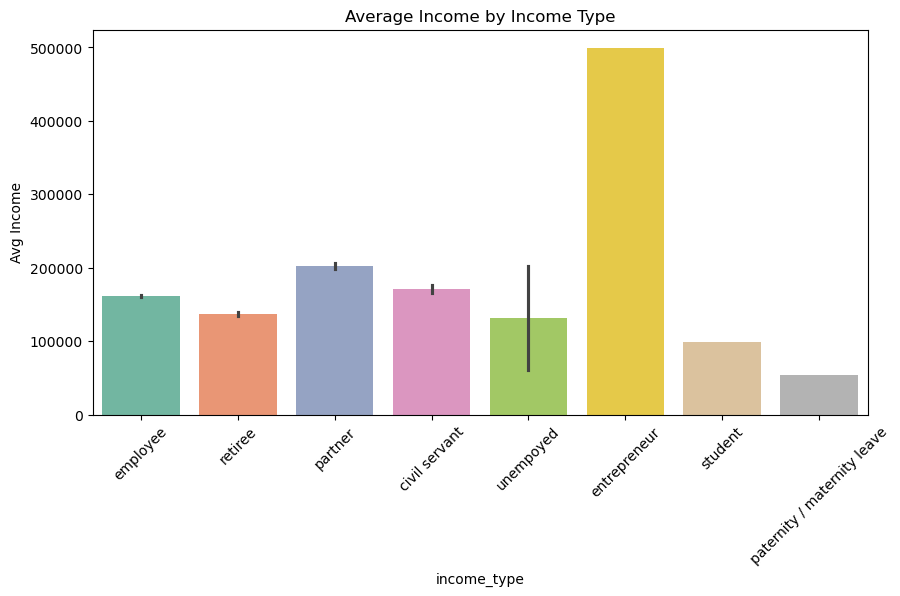

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(x='income_type', y='total_income', data=df, estimator=np.mean, palette='Set2')

plt.xticks(rotation=45)
plt.title("Average Income by Income Type")
plt.ylabel("Avg Income")
plt.show()


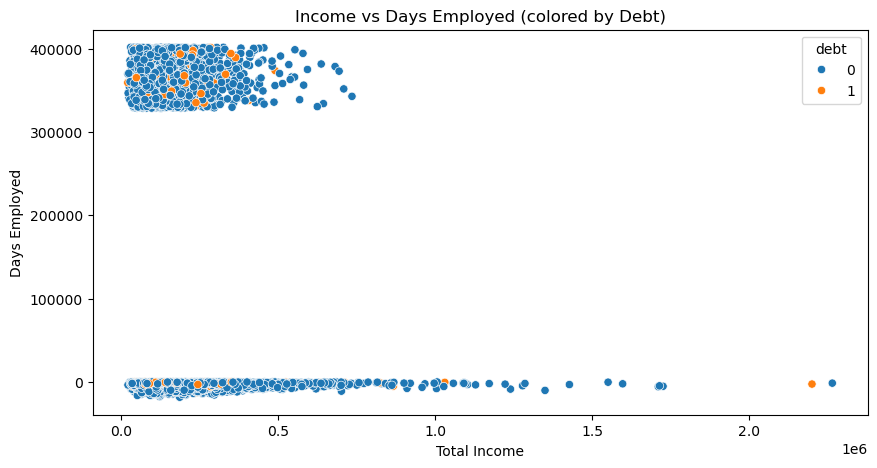

In [70]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='total_income', y='days_employed', hue='debt', data=df)
plt.title("Income vs Days Employed (colored by Debt)")
plt.xlabel("Total Income")
plt.ylabel("Days Employed")
plt.show()


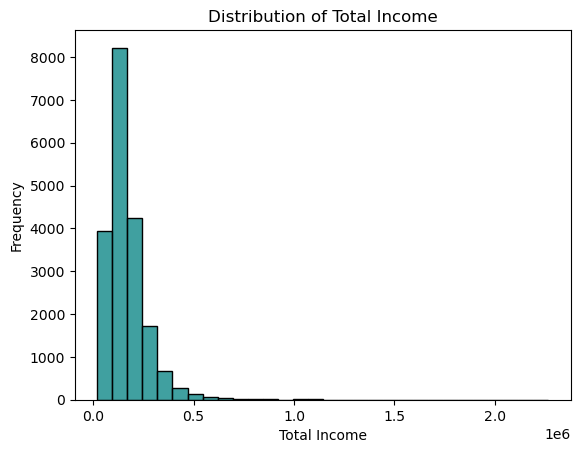

In [76]:
sns.histplot(df['total_income'], bins=30, color='teal')
plt.title("Distribution of Total Income")
plt.xlabel("Total Income")
plt.ylabel("Frequency")
plt.show()